### Notebook Skill Gap Module Career Path Navigator API


Projek akan diintegrasikan dengan modul lain untuk pemenuhan capstone project dicoding path data science. Capaian projek ialah membuat career path navigator.

# Import Library

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
# Library Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix

Load Dataset

In [103]:
df = pd.read_csv("../anang/export/final_data.csv", delimiter=",")
df.head()

id                                  job_title       location  \
0  10                             Tax Supervisor         Banten   
1  27  MARKETING COMMUNICATION & CHANNEL MANAGER  Jakarta Pusat   
2  32                                       PPIC      Tangerang   
3  35               C# Advanced/Senior Developer  Jakarta Timur   
4  38                IT Software Developer Staff  Jakarta Barat   

  salary_currency                              career_level experience_level  \
0             IDR                    Supervisor/Koordinator          3 tahun   
1             IDR                   Manajer/Asisten Manajer          2 tahun   
2             IDR                   Manajer/Asisten Manajer          5 tahun   
3             IDR                    Supervisor/Koordinator          2 tahun   
4             IDR  Pegawai (non-manajemen & non-supervisor)          1 tahun   

                                                                       education_level  \
0                    Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)   
1                                                                 Tidak terspesifikasi   
2                                                                         Sarjana (S1)   
3  SMA, SMU/SMK/STM, Sertifikat Professional, D3 (Diploma), D4 (Diploma), Sarjana (S1)   
4                Sarjana (S1), Diploma Pascasarjana, Gelar Professional, Magister (S2)   

  employment_type                                         job_function  \
0     Penuh Waktu                   Akuntansi / Keuangan,Audit & Pajak   
1     Penuh Waktu  Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis   
2     Penuh Waktu                                Manufaktur,Manufaktur   
3     Penuh Waktu      Komputer/Teknologi Informasi,IT-Perangkat Lunak   
4     Penuh Waktu      Komputer/Teknologi Informasi,IT-Perangkat Lunak   

                                                                                             job_benefits  \
0  Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja);BPJS, Bonus, Annual Reward   
1            Asuransi Gigi;Asuransi kesehatan;Parkir;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)   
2                                 Asuransi kesehatan;Waktu regular, Senin - Jumat;Bisnis (contoh: Kemeja)   
3                               Tip;Asuransi kesehatan;Waktu regular, Senin - Jumat;Kasual (contoh: Kaos)   
4                                           Kasual (contoh: Kaos);Senin - Jum'at (HO) Senin - Sabtu (DSO)   

   ...                                      company_industry  \
0  ...                            Konstruksi/Bangunan/Teknik   
1  ...  Konsultasi (IT, Ilmu Pengetahuan, Teknis & Teknikal)   
2  ...                                   Manufaktur/Produksi   
3  ...         Komputer/Teknik Informatika (Perangkat Lunak)   
4  ...                        Industri Berat/Mesin/Peralatan   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

Mapping Job Function dan ganti value dengan hasil mapping

In [89]:
job_function_mapping = {
        # Finance & Accounting
        "Akuntansi / Keuangan,Audit & Pajak": "Finance & Accounting",
        "Akuntansi / Keuangan,Akuntansi Umum / Pembiayaan": "Finance & Accounting",
        "Akuntansi / Keuangan,Perbankan / Jasa Finansial ": "Finance & Accounting",
        "Akuntansi / Keuangan,Keuangan / Investasi Perusahaan ": "Finance & Accounting",
        "Sains,Aktuaria/Statistik": "Finance & Accounting",

        # IT & Software
        "Komputer/Teknologi Informasi,IT-Perangkat Lunak": "IT & Software",
        "Komputer/Teknologi Informasi,IT-Admin Jaringan/Sistem/Database": "IT & Software",
        "Komputer/Teknologi Informasi,IT-Perangkat Keras": "IT & Software",

        # Engineering (Non-IT)
        "Teknik,Teknik Lingkungan": "Engineering",
        "Teknik,Teknik Lainnya": "Engineering",
        "Teknik,Mekanikal": "Engineering",
        "Teknik,Teknik Elektronika": "Engineering",
        "Teknik,Teknik Elektro": "Engineering",
        "Teknik,Teknik Industri": "Engineering",
        "Teknik,Teknik Kimia": "Engineering",
        "Bangunan/Konstruksi,Teknik Sipil/Konstruksi Bangunan": "Engineering",
        "Bangunan/Konstruksi,Survei Kuantitas": "Engineering",

        # Manufacturing & Operations
        "Manufaktur,Manufaktur": "Manufacturing & Operations",
        "Manufaktur,Pemeliharaan": "Manufacturing & Operations",
        "Manufaktur,Pembelian/Manajemen Material": "Manufacturing & Operations",
        "Manufaktur,Penjaminan Kualitas / QA": "Manufacturing & Operations",
        "Pelayanan,Logistik/Rantai Pasokan": "Manufacturing & Operations",

        # Sales & Marketing
        "Penjualan / Pemasaran,Pemasaran/Pengembangan Bisnis": "Sales & Marketing",
        "Penjualan / Pemasaran,Digital Marketing": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Jasa Keuangan": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Teknik/Teknikal/IT": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan Ritel": "Sales & Marketing",
        "Penjualan / Pemasaran,Merchandising": "Sales & Marketing",
        "Penjualan / Pemasaran,Penjualan - Korporasi": "Sales & Marketing",
        "Penjualan / Pemasaran,Telesales/Telemarketing": "Sales & Marketing",
        "Penjualan / Pemasaran,E-commerce": "Sales & Marketing",
        "Seni/Media/Komunikasi,Periklanan": "Sales & Marketing",

        # HR & Administration
        "Sumber Daya Manusia/Personalia,Sumber Daya Manusia / HR": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Staf / Administrasi umum": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Sekretaris": "HR & Administration",
        "Sumber Daya Manusia/Personalia,Top Management / Manajemen Tingkat Atas": "HR & Administration",

        # Creative & Media
        "Seni/Media/Komunikasi,Seni / Desain Kreatif": "Creative & Media",
        "Seni/Media/Komunikasi,Hubungan Masyarakat": "Creative & Media",
        "Seni/Media/Komunikasi,Hiburan": "Creative & Media",
        "Lainnya,Jurnalis/Editor": "Creative & Media",

        # Healthcare & Life Sciences
        "Layanan Kesehatan,Diagnosa/Lainnya": "Healthcare",
        "Layanan Kesehatan,Farmasi": "Healthcare",
        "Layanan Kesehatan,Praktisi/Asisten Medis": "Healthcare",
        "Sains,Bioteknologi": "Healthcare",
        "Sains,Biomedis": "Healthcare",
        "Sains,Kimia": "Healthcare",
        "Sains,Geologi/Geofisika": "Healthcare",

        # Education & Training
        "Pendidikan/Pelatihan,Pendidikan": "Education",
        "Pendidikan/Pelatihan,Pelatihan & Pengembangan": "Education",

        # Hospitality & Service
        "Hotel/Restoran,Makanan/Minuman/Pelayanan Restoran": "Hospitality & Service",
        "Hotel/Restoran,Hotel/Pariwisata": "Hospitality & Service",
        "Pelayanan,Layanan Pelanggan": "Hospitality & Service",
        "Pelayanan,Teknikal & Bantuan Pelanggan": "Hospitality & Service",
        "Pelayanan,Perawatan Pribadi": "Hospitality & Service",

        # Legal & Public Service
        "Pelayanan,Pengacara / Asisten Legal": "Legal & Public Service",
        "Pelayanan,Angkatan Bersenjata": "Legal & Public Service",

        # Science & Agriculture
        "Sains,Pertanian": "Science & Agriculture",
        "Sains,Teknologi Makanan/Ahli Gizi": "Science & Agriculture",
        "Sains,Sains & Teknologi": "Science & Agriculture",

        # Other
        "Bangunan/Konstruksi,Arsitek/Desain Interior": "Other",
        "Bangunan/Konstruksi,Properti/Real Estate": "Other",
        "Lainnya,Pekerjaan Umum": "Other",
        "Lainnya,Lainnya/Kategori tidak tersedia": "Other",
    }
# ganti value asli dengan hasil mapping
df["job_function_group"] = (
    df["job_function"]
    .map(job_function_mapping)
    .fillna("Other")
)

Drop data yang tidak punya skill

In [90]:
df = df.dropna(subset=['skills', 'job_function_group'])

# Training Model RF & TF-IDF

**Training Model**

In [91]:
# tf-idf dengan pendekatan N-Gram
tfidf = TfidfVectorizer(
    max_features=2000,           
    stop_words='english',        
    ngram_range=(1, 3),          # Tangkap frasa sampai 3 kata
    min_df=5,                    
    max_df=0.7                   
)
# X merupakan skills, y merupakan job function
X = tfidf.fit_transform(df['skills'])
y = df['job_function_group']
# mendapatkan fitur
feature_names = np.array(tfidf.get_feature_names_out())
#Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# inisiasi training dengan random forest
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=1,
    class_weight='balanced' # job function sales dan marketing imbalance, maka ditambahkan balanced agar model balancing
)
rf.fit(X_train, y_train)
# Cek Akurasi
acc = rf.score(X_test, y_test)
print(f"Akurasi Test Set: {acc:.2%}")

Akurasi Test Set: 80.51%


**Evaluasi Model**

Laporan Metrics Untuk Setiap Job Function
                            precision    recall  f1-score   support

          Creative & Media       0.55      0.50      0.52        24
                 Education       1.00      0.67      0.80         6
               Engineering       0.69      0.67      0.68        27
      Finance & Accounting       0.90      0.87      0.89        62
       HR & Administration       0.83      0.61      0.70        31
                Healthcare       1.00      0.17      0.29         6
     Hospitality & Service       0.78      0.47      0.58        15
             IT & Software       0.92      0.90      0.91       122
    Legal & Public Service       0.00      0.00      0.00         1
Manufacturing & Operations       0.76      0.64      0.69        44
                     Other       0.50      0.31      0.38        16
         Sales & Marketing       0.79      0.93      0.85       230
     Science & Agriculture       0.00      0.00      0.00         1

    

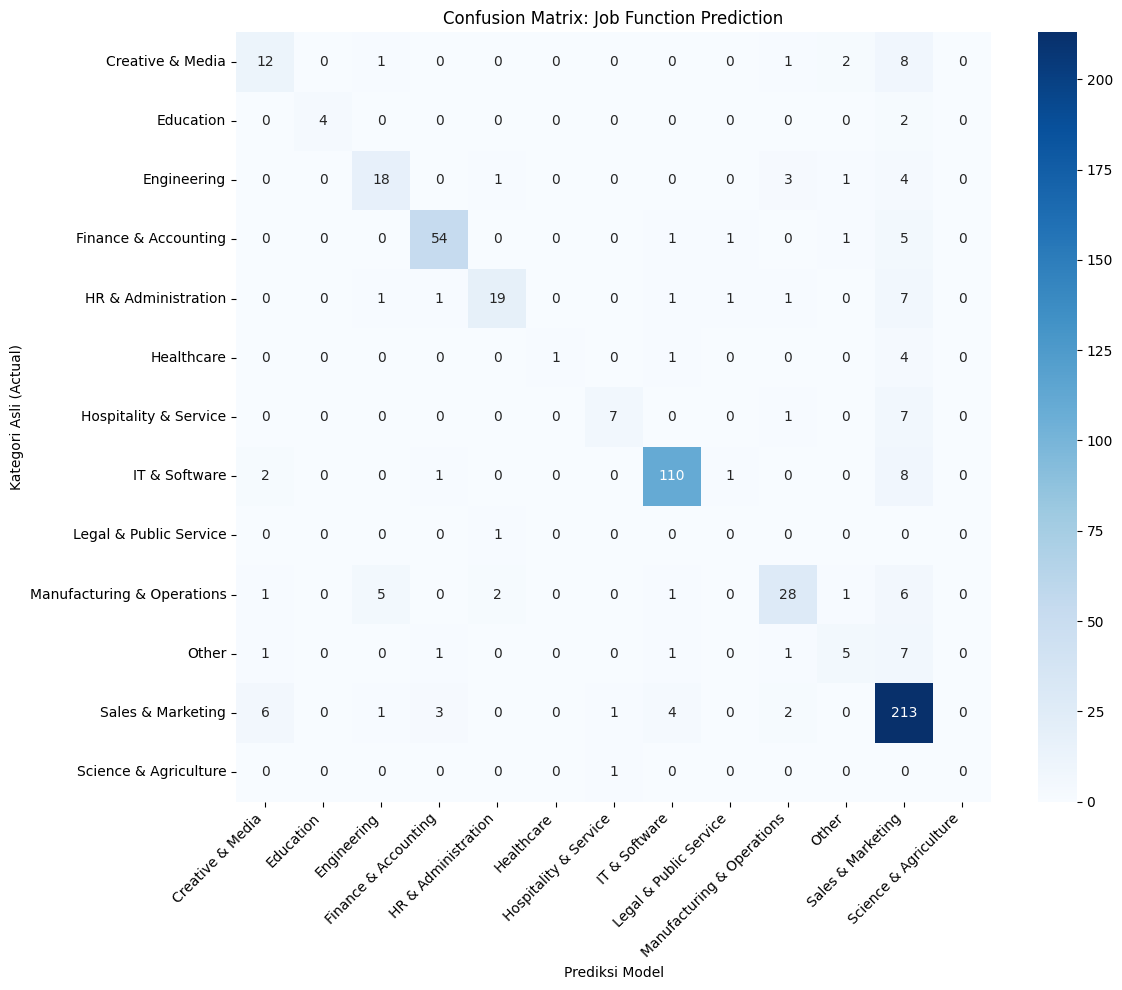

In [92]:
#Prediksi pada Test Set
y_pred = rf.predict(X_test)

# Tampilkan metrics untuk setiap kategori pekerjaan
print(f"Laporan Metrics Untuk Setiap Job Function")

# zero_division=0 agar tidak error jika ada kategori yang datanya kosong
report = classification_report(y_test, y_pred, zero_division=0)
print(report)
      
# Visualisasi Confusion Matrix
print(f"Confusion Matrix Heatmap")
# Buat Matrix
cm = confusion_matrix(y_test, y_pred)
labels = rf.classes_ # Mengambil nama kategori otomatis dari model

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli (Actual)')
plt.title('Confusion Matrix: Job Function Prediction')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Terjadi Class Imbalance**

1. Mengapa Terjadi Ketimpangan?
* Mayoritas: Lowongan Sales dan IT memang mendominasi pasar kerja
* Minoritas: Lowongan Legal atau Agriculture jarang muncul

2. "Weighted Average" vs "Macro Average"
* Weighted Average memberikan bobot lebih pada kelas mayoritas (Sales/IT), maka skornya bisa tinggi (0,81%)
* Macro Average menganggap semua kelas sama pentingnya, maka skornya rendah karena terjadi ketimpangan (0,52%)

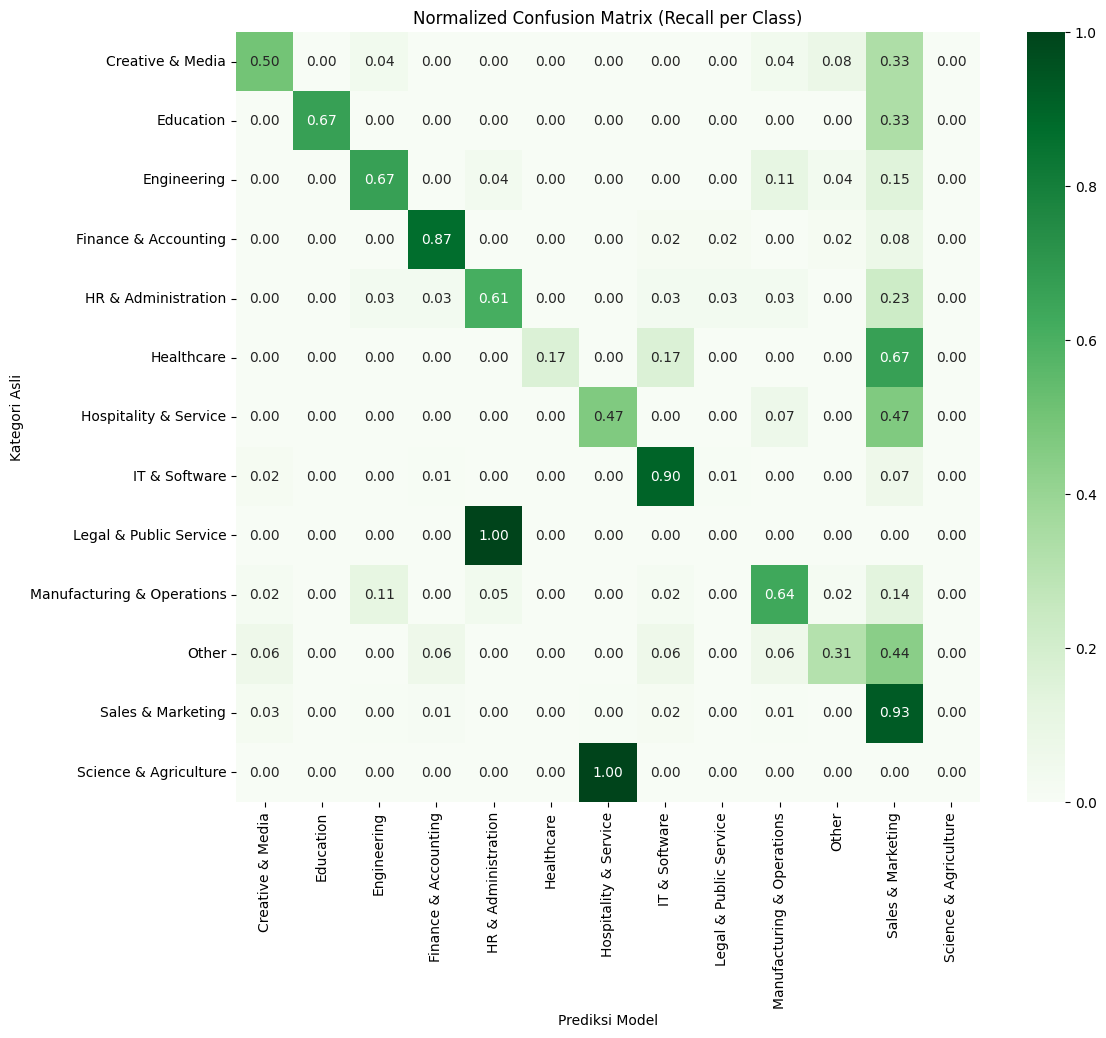

In [93]:
# Hitung Confusion Matrix dengan Normalisasi
# normalize='true' artinya mengubah angka jadi persentase per baris (Recall)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true') 

plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli')
plt.title('Normalized Confusion Matrix (Recall per Class)')
plt.show()

* **Imbalance class**  masih terjadi meskipun model telah menerapkan balancing. Terlihat pada prediksi di confusion matrix, job function dengan skor recall tinggi hanya pada sales & marketing, IT & software, dan finance & accounting. 
* **Imbalance class**  bisa diatasi dengan Resampling (SMOTE), Regrouping, dan Ganti Algoritma seperti XGBoost dan LightGBM yang dapat menangani imbalance lebih baik

Dengan konsiderasi bahwa f1 score sudah baik (0,81%), maka digunakan regrouping untuk mengumpulkan data yang sedikit sampelnya ke satu kelas agar model tidak bingung dan confusion matrix menjadi lebih baik.

### Cleaning Data dan Regroup Job Function

**Tentukan Outlier untuk Batas Ambang (Treshold) Regrouping pada kolom Skills**

                                                                                                                                                                                                                                                                                              skills  \
0  ['income tax', 'tax compliance', 'digital electronic', 'general ledger', 'tax law', 'construction engineering', 'article', 'numbers', 'financial transaction', 'reconciliation', 'withholding tax', 'accounting', 'operate', 'operate system', 'professional', 'communication skills', 'english']   
1                                         ['marketing communication', 'strategic communication', 'communication planning', 'corporate branding', 'social medium', 'plan develop', 'brand', 'budget', 'dissemination', 'marketing content', 'content manage', 'adapt', 'communication', 'milestones']   
2                                                                                                               

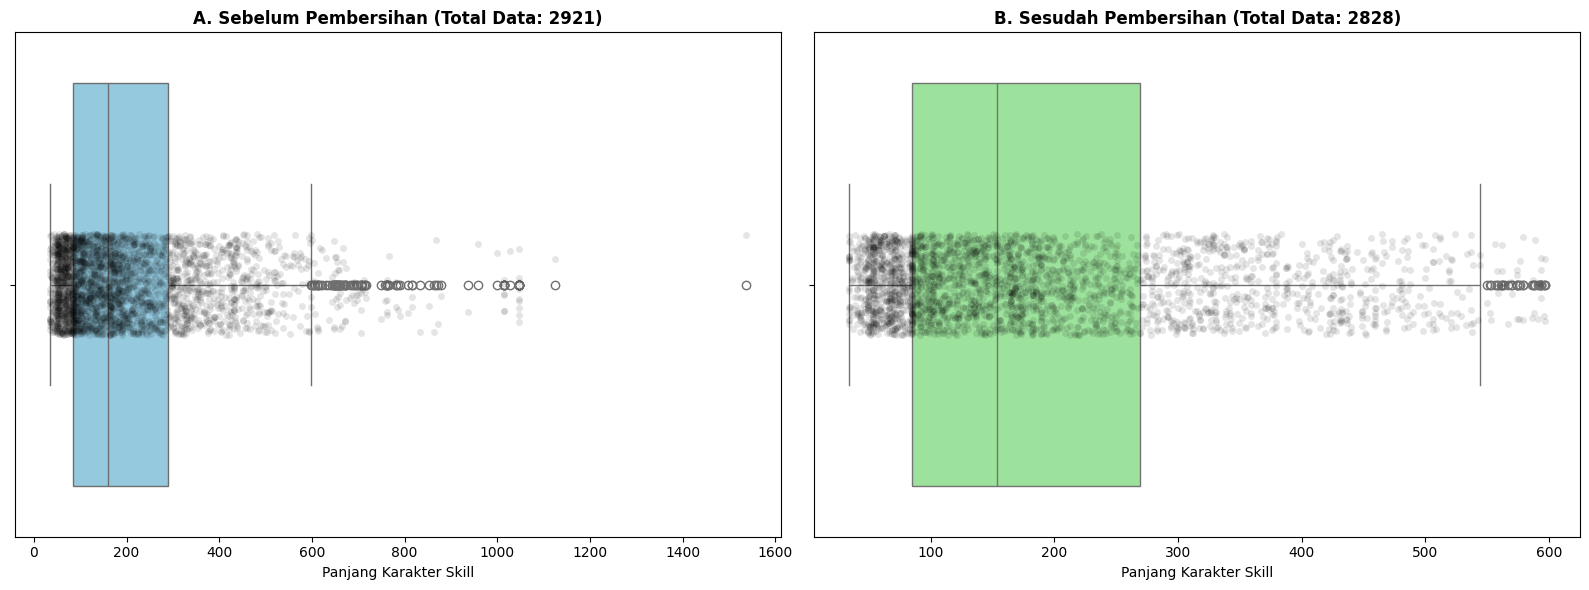


 contoh yang melebihi batas atas: 
                                   job_title  skill_length  \
1542                      Head IT Department          1536   
2507  Marketing Specialist - Digital Content          1124   
779                E-commerce Mandarin(中文运营)          1047   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [94]:
#drop NaN di kolom 'skills' 
df = df.dropna(subset=['skills']).copy()

# Hitung panjang karakter dari setiap teks skill
df['skill_length'] = df['skills'].astype(str).str.len()

# print contoh skills dan skills lengthnya
print(df[['skills', 'skill_length']].head())
print("-" * 60)


# Visualisasi boxplot sebelum outlier
# Siapkan area plotting 2 kolom (Kiri: Sebelum, Kanan: Sesudah)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot Kiri (Data Mentah)
sns.boxplot(x=df['skill_length'], ax=axes[0], color='skyblue')
axes[0].set_title(f'A. Sebelum Pembersihan (Total Data: {len(df)})', fontweight='bold')
axes[0].set_xlabel('Panjang Karakter Skill')
# Tambahkan sedikit jitter (titik-titik) agar sebaran data terlihat
sns.stripplot(x=df['skill_length'], ax=axes[0], color='black', alpha=0.1, jitter=True)

# Perhitungan metode IQR untuk data outlier
Q1 = df['skill_length'].quantile(0.25)
Q3 = df['skill_length'].quantile(0.75)

# Interquartile Range 
IQR = Q3 - Q1

# Menentukan Batas
# Batas bawah kita kunci di 0, karena panjang karakter tidak mungkin negatif
lower_bound = max(0, Q1 - (1.5 * IQR)) 
upper_bound = Q3 + (1.5 * IQR)

print("📊 STATISTIK IQR:")
print(f"   - Q1 (25% data)    : {Q1:.2f} karakter")
print(f"   - Q3 (75% data)    : {Q3:.2f} karakter")
print(f"   - IQR              : {IQR:.2f}")
print("-" * 30)
print(f"🎯 BATAS ILMIAH OUTLIER:")
print(f"   - Batas Bawah      : < {lower_bound:.2f} karakter")
print(f"   - Batas Atas       : > {upper_bound:.2f} karakter")
print("-" * 60)

# Filter data
# Identifikasi data outlier
outliers = df[(df['skill_length'] < lower_bound) | (df['skill_length'] > upper_bound)]

# Buat dataframe baru yang bersih (Hanya data di dalam batas)
df_clean = df[(df['skill_length'] >= lower_bound) & (df['skill_length'] <= upper_bound)].copy()

#tunjukan hasil filtering
print(f"Hasil filtering:")
print(f"   - Data Awal        : {len(df)}")
print(f"   - Outlier Dibuang  : {len(outliers)} ({len(outliers)/len(df):.2%})")
print(f"   - Data Bersih      : {len(df_clean)}")


# Visualisasi data setelah outlier
# Plot Kanan (Data Bersih)
sns.boxplot(x=df_clean['skill_length'], ax=axes[1], color='lightgreen')
axes[1].set_title(f'B. Sesudah Pembersihan (Total Data: {len(df_clean)})', fontweight='bold')
axes[1].set_xlabel('Panjang Karakter Skill')
# Tambahkan jitter
sns.stripplot(x=df_clean['skill_length'], ax=axes[1], color='black', alpha=0.1, jitter=True)

plt.tight_layout()
plt.show()

# cek outlier yang dibuang
if len(outliers) > 0:
    print("\n contoh yang melebihi batas atas: ")
    print(outliers.sort_values('skill_length', ascending=False)[['job_title', 'skill_length', 'skills']].head(3))
    print("\n contoh yang melebihi batas bawah:")
    print(outliers.sort_values('skill_length', ascending=True)[['job_title', 'skill_length', 'skills']].head(3))

**Cek & Visualisasi Jumlah Data Per Group**

Total Jumlah Kategori Awal: 13
Detail Jumlah Data per Kategori:
--------------------------------------------------
Kategori                                 | Jumlah     | Persentase
--------------------------------------------------
Sales & Marketing                        | 1012       | 35.79%
IT & Software                            | 547        | 19.34%
Finance & Accounting                     | 281        | 9.94%
Manufacturing & Operations               | 240        | 8.49%
HR & Administration                      | 194        | 6.86%
Engineering                              | 146        | 5.16%
Creative & Media                         | 131        | 4.63%
Hospitality & Service                    | 80         | 2.83%
Other                                    | 73         | 2.58%
Education                                | 64         | 2.26%
Healthcare                               | 29         | 1.03%
Legal & Public Service                   | 18         | 0.64%
Science & Agriculture

C:\Users\ACER\AppData\Local\Temp\ipykernel_8404\776298472.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_counts.values, y=group_counts.index, palette="viridis")


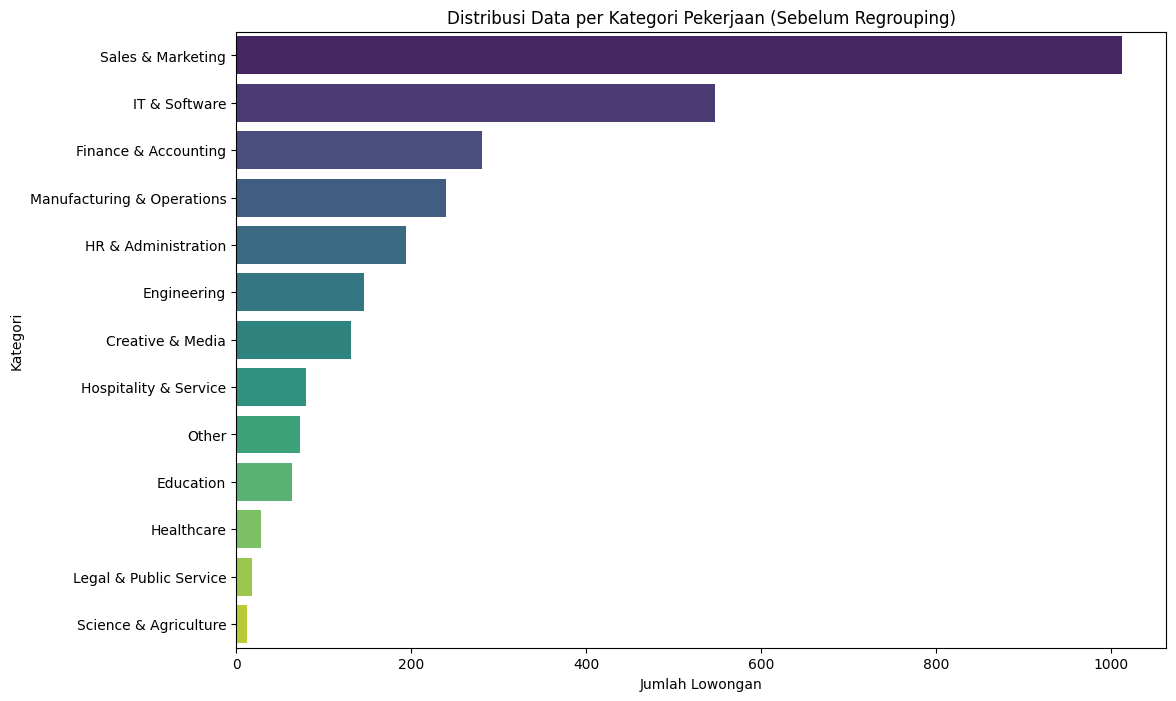

In [95]:
#Hitung Jumlah Data per Kategori
group_counts = df_clean['job_function_group'].value_counts()

#Tampilkan Angka Detail
print(f"Total Jumlah Kategori Awal: {len(group_counts)}")
print("Detail Jumlah Data per Kategori:")
print("-" * 50)
print(f"{'Kategori':<40} | {'Jumlah':<10} | {'Persentase':<10}")
print("-" * 50)

total_data = len(df_clean)
for category, count in group_counts.items():
    percent = (count / total_data) * 100
    print(f"{category:<40} | {count:<10} | {percent:.2f}%")

#Visualisasi Bar Chart (Agar ketimpangan terlihat jelas)
plt.figure(figsize=(12, 8))
sns.barplot(x=group_counts.values, y=group_counts.index, palette="viridis")
plt.title('Distribusi Data per Kategori Pekerjaan (Sebelum Regrouping)')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Kategori')
plt.show()

**Proses Regrouping**

In [96]:
# 1. Tentukan Threshold (Batas Minimal Data)
THRESHOLD = 100  

# Identifikasi Kategori Kecil
small_cats = group_counts[group_counts < THRESHOLD].index.tolist()

if len(small_cats) > 0:
    print(f"Ditemukan {len(small_cats)} kategori dengan jumlah data < {THRESHOLD}.")
    print(f"   Mereka akan digabungkan menjadi kategori 'Other'.")
    print(f"   List Kategori: {small_cats}")
    
    # 3. Lakukan Penggantian (Regrouping)
    # Jika kategori ada di list small_cats, ubah jadi 'Other', jika tidak biarkan.
    df_clean['job_function_group'] = df_clean['job_function_group'].apply(
        lambda x: 'Other' if x in small_cats else x
    )
else:
    print("\n✅ Tidak ada kategori di bawah threshold. Data tetap.")

Ditemukan 6 kategori dengan jumlah data < 100.
   Mereka akan digabungkan menjadi kategori 'Other'.
   List Kategori: ['Hospitality & Service', 'Other', 'Education', 'Healthcare', 'Legal & Public Service', 'Science & Agriculture']


**Analisis Setelah Regrouping**

Total Jumlah Kategori Sekarang: 8
--------------------------------------------------
Kategori                                 | Jumlah     | Persentase
--------------------------------------------------
Sales & Marketing                        | 1012       | 35.79%
IT & Software                            | 547        | 19.34%
Finance & Accounting                     | 281        | 9.94%
Other                                    | 277        | 9.79%
Manufacturing & Operations               | 240        | 8.49%
HR & Administration                      | 194        | 6.86%
Engineering                              | 146        | 5.16%
Creative & Media                         | 131        | 4.63%


C:\Users\ACER\AppData\Local\Temp\ipykernel_8404\3158674300.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=new_counts.values, y=new_counts.index, palette="magma")


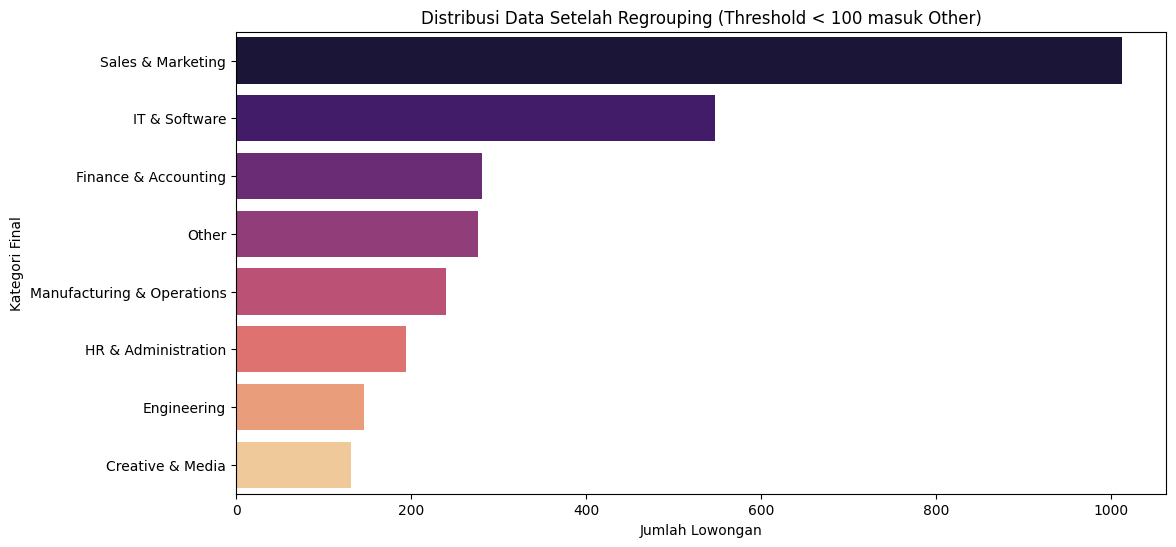

In [97]:
# Hitung Ulang Jumlah Data
new_counts = df_clean['job_function_group'].value_counts()

# Tampilkan Angka Detail Baru
print(f"Total Jumlah Kategori Sekarang: {len(new_counts)}")
print("-" * 50)
print(f"{'Kategori':<40} | {'Jumlah':<10} | {'Persentase':<10}")
print("-" * 50)

for category, count in new_counts.items():
    percent = (count / total_data) * 100
    print(f"{category:<40} | {count:<10} | {percent:.2f}%")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 6)) # penyusutan ukuran bar
# Buat chartnya
sns.barplot(x=new_counts.values, y=new_counts.index, palette="magma")
plt.title(f'Distribusi Data Setelah Regrouping (Threshold < {THRESHOLD} masuk Other)')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Kategori Final')
plt.show()

Job Function Hospitality & Service', 'Other', 'Education', 'Healthcare', 'Legal & Public Service', 'Science & Agriculture' dioper ke 'Other'

# Re-Training TF-IDF dan RF Model

In [98]:
# Inisiasi ulang model tf-idf
tfidf = TfidfVectorizer(
    max_features=2500,           # menaikkan sedikit fitur karena data lebih bersih
    stop_words='english',        
    ngram_range=(1, 3),          # Tangkap frasa yang lebih umum dan logis
    min_df=5,                    # Hapus typo unik
    max_df=0.8                   # Hapus kata terlalu umum
)

# X = Skills, y = Job Function Group (Target Baru)
X = tfidf.fit_transform(df_clean['skills'])
y = df_clean['job_function_group']

# masukkan array tf-idf ke feature_names
feature_names = np.array(tfidf.get_feature_names_out())

#Split dan Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# class_weight='balanced' tetap kita pakai sebagai pengaman ekstra
rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=1, 
    class_weight='balanced'
) 

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

**Evaluasi Model Baru**

Evaluasi Model Baru
                            precision    recall  f1-score   support

          Creative & Media       0.73      0.62      0.67        26
               Engineering       0.54      0.52      0.53        29
      Finance & Accounting       0.81      0.89      0.85        56
       HR & Administration       0.69      0.56      0.62        39
             IT & Software       0.92      0.90      0.91       110
Manufacturing & Operations       0.69      0.56      0.62        48
                     Other       0.66      0.56      0.61        55
         Sales & Marketing       0.83      0.94      0.88       203

                  accuracy                           0.80       566
                 macro avg       0.73      0.69      0.71       566
              weighted avg       0.79      0.80      0.79       566



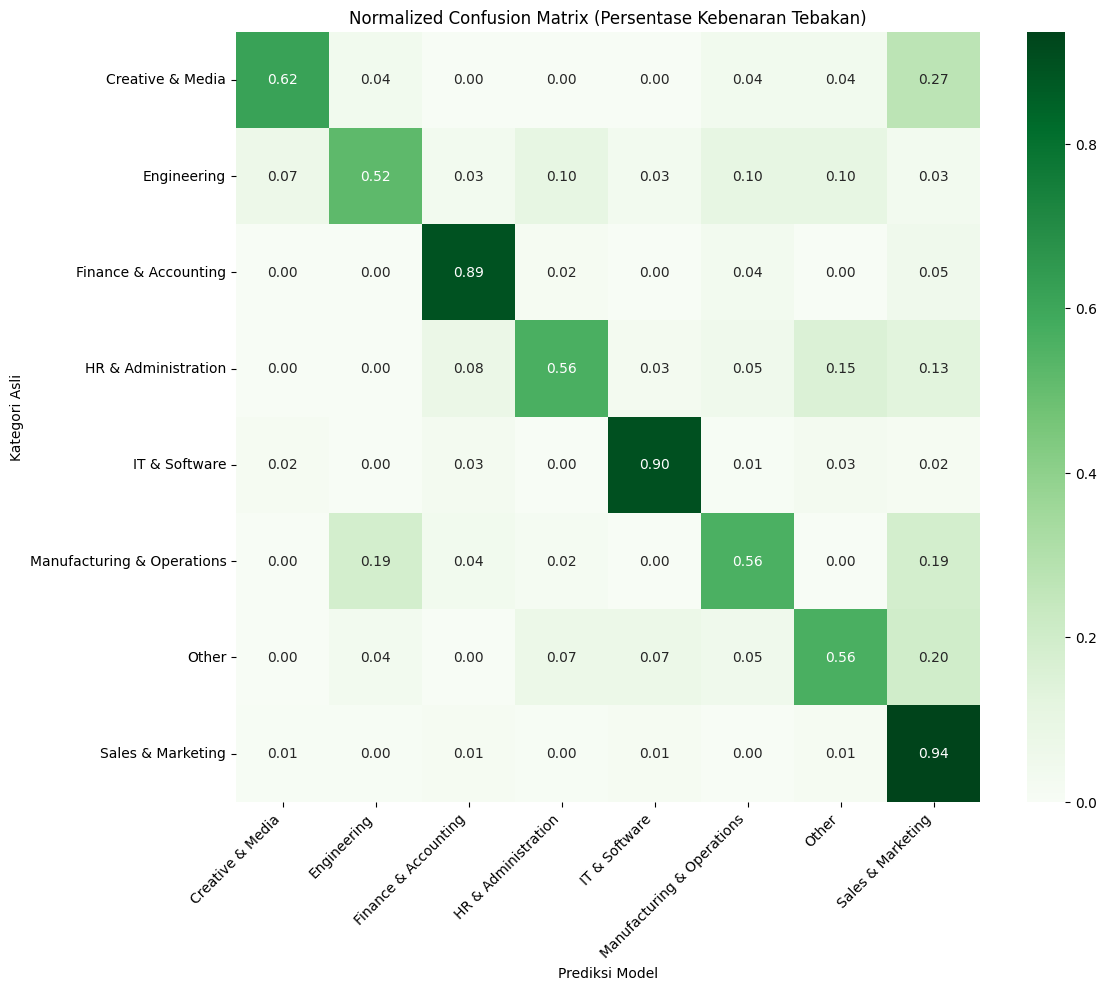

In [99]:
print("Evaluasi Model Baru")
y_pred = rf.predict(X_test)

# Report Text
print(classification_report(y_test, y_pred, zero_division=0))

# Normalisasi Confusion Matrix
# Buat dalam persen recall
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
labels = rf.classes_

#Buat confusion matrix normalisasi
plt.figure(figsize=(12, 10))
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Greens', 
            xticklabels=labels, yticklabels=labels)
plt.title('Normalized Confusion Matrix (Persentase Kebenaran Tebakan)')
plt.xlabel('Prediksi Model')
plt.ylabel('Kategori Asli')
plt.xticks(rotation=45, ha='right')
plt.show()


**Terjadi Trade-off**
* Sebelumnya (0.81): Model "bermain aman". Karena data Sales/IT sangat banyak, model cenderung menebak Sales/IT terus-menerus. Akurasinya tinggi karena tebakannya kebetulan benar (karena datanya memang banyak di sana), tapi model itu sebenarnya kurang bagus mengenali kategori lain.

* Sekarang (0.78): Model dipaksa belajar mengenali kategori sulit (seperti Engineering atau Finance). Kadang dia salah tebak di kategori sulit ini, yang sedikit menurunkan rata-rata total. Tapi, dia tidak lagi asal menebak "Sales" untuk segala hal.

**Peningkatan Macro Average** 

Macro Avg menghitung rata-rata tanpa peduli jumlah data.

* Artinya: Kemampuan model mengenali kategori kecil (misal: Other atau Finance) hampir setara dengan kemampuannya mengenali kategori raksasa (Sales).

* Selisih antara Weighted (0.78) dan Macro (0.72) yang tipis (hanya 0.06) menandakan model Anda Sangat Seimbang. (Model yang bias biasanya punya selisih > 0.20).

# Feature Importance dan Skill Gap Module

Hitung Importance Menggunakan Feature Importance dari Random Forest

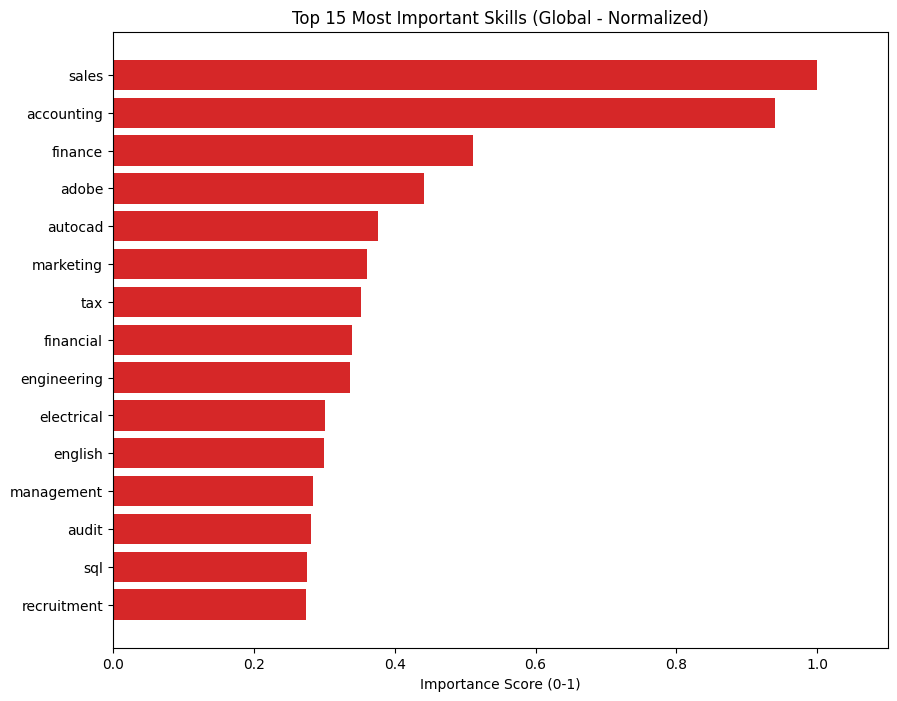

In [100]:
#Ambil Feature Importance dari Model yang baru dilatih
raw_importances = rf.feature_importances_

# Normalisasi (Scaling 0.0 s/d 1.0)
# Skill paling penting akan bernilai 1.0
max_val = raw_importances.max()
normalized_importances = raw_importances / max_val

# Simpan ke Dictionary (Mapping Nama Skill -> Skor)
global_importance_dict = dict(zip(feature_names, normalized_importances))

# Visualisasi Top 15 Skill 
indices = np.argsort(normalized_importances)[-15:]


#buat barplot
plt.figure(figsize=(10, 8))
plt.title('Top 15 Most Important Skills (Global - Normalized)')
plt.barh(range(len(indices)), normalized_importances[indices], color='#d62728', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance Score (0-1)')
plt.xlim(0, 1.1) 
plt.show()

Berdasarkan grafik Global Feature Importance di atas, model Random Forest menilai 15 kata/frasa tersebut sebagai fitur yang paling krusial. Beberapa kata mungkin terlihat terlalu umum (seperti "adobe" atau "human"), namun secara statistik, kata-kata ini memiliki Daya Pembeda (Discriminative Power) yang sangat tinggi untuk mengelompokkan Job Function Group.

**Pembuatan Skill Gap Module dengan Harmonic Mean Logic**

Dalam modul rekomendasi skill (Skill Gap Module), sistem tidak menggunakan rata-rata aritmatika biasa untuk memberikan skor rekomendasi. Sebaliknya, kami menerapkan Rerata Harmonis (Harmonic Mean), sebuah pendekatan yang sama dengan perhitungan F1-Score dalam evaluasi klasifikasi.

Skor akhir ($S$) untuk setiap kandidat skill dihitung berdasarkan dua komponen:

1. Relevance ($R$): Seberapa besar "kekosongan" (gap) skill ini pada target pekerjaan yang dituju user? (Dihitung dari selisih vektor TF-IDF).
2. Importance ($I$): Seberapa vital skill ini secara global menurut model Random Forest? (Dihitung dari Feature Importance).

Harmonic Mean Logic

$$Score = \frac{2 \times (Relevance \times Importance)}{Relevance + Importance}$$

Dengan menggunakan Harmonic Mean, sistem menjamin bahwa skill yang direkomendasikan adalah skill yang benar-benar "High Impact" secara global, namun tetap "Contextually Accurate" dengan tujuan karir user.

In [101]:
class SkillGapModule:
    def __init__(self, vectorizer, df_data, global_imp_dict):
        self.vectorizer = vectorizer
        self.feature_names = vectorizer.get_feature_names_out()
        self.global_imp = global_imp_dict
        self.df_data = df_data
        
    def get_target_vector(self, target_group_keyword):
        # Cari Group yang mengandung keyword (Case Insensitive)
        # Target pencarian adalah kolom 'job_function_group'
        mask = self.df_data['job_function_group'].str.contains(target_group_keyword, case=False, na=False)
        matched_df = self.df_data[mask]
        
        if matched_df.empty:
            return None, []
        
        found_groups = matched_df['job_function_group'].unique().tolist()
        
        #Buat Profil Gabungan (Rata-rata skill di group tersebut)
        all_skills_text = matched_df['skills']
        target_vec_matrix = self.vectorizer.transform(all_skills_text)
        
        #Rata-rata vektor (Centroid)
        composite_vector = np.asarray(target_vec_matrix.mean(axis=0)).flatten()
        
        return composite_vector, found_groups

    def analyze(self, user_skills_text, target_group_keyword, top_n=10):
        #Dapatkan Vektor Target Group
        target_vec, found_groups = self.get_target_vector(target_group_keyword)
        
        if target_vec is None:
            print(f"Kategori '{target_group_keyword}' tidak ditemukan.")
            print(f"Available Groups: {self.df_data['job_function_group'].unique()[:5]}...")
            return []
        
        #Info untuk User
        print(f"Menganalisis Gap terhadap Kategori: {found_groups[0]}")
        
        #Hitung Vektor User
        user_vec = self.vectorizer.transform([user_skills_text]).toarray().flatten()
        
        #Hitung Gap (Hanya ambil yang positif/kurang)
        # Target - User
        gap_vec = np.maximum(0, target_vec - user_vec)
        
        # Threshold 0.005 untuk membuang noise kecil
        gap_indices = np.where(gap_vec > 0.005)[0]
        
        if len(gap_indices) == 0:
            print("✅ Tidak ada gap skill yang signifikan! (Perfect Match)")
            return []

        # Scoring Kandidat Skill
        candidates = []
        for idx in gap_indices:
            skill_name = self.feature_names[idx]
            
            # RELEVANCE: Seberapa besar gap skill ini di Group target?
            relevance = gap_vec[idx]
            
            # IMPORTANCE: Seberapa penting skill ini secara global (Model RF)?
            importance = self.global_imp.get(skill_name, 0)
            
            candidates.append({
                'skill': skill_name,
                'relevance': relevance,
                'importance': importance
            })
            
        if not candidates:
            return []
            
        #Normalisasi & Harmonic Mean (Scoring Akhir)
        df_cand = pd.DataFrame(candidates)
        scaler = MinMaxScaler()
        
        #Scale Relevance & Importance agar setara (0-1)
        if len(df_cand) > 1:
            scaled_vals = scaler.fit_transform(df_cand[['relevance', 'importance']])
            df_cand['rel_norm'] = scaled_vals[:, 0]
            df_cand['imp_norm'] = scaled_vals[:, 1]
        else:
            df_cand['rel_norm'] = 1.0
            df_cand['imp_norm'] = 1.0
            
        # Rumus Harmonic Mean (F1-Score Logic)
        # Mengutamakan skill yang Relevance tinggi dan Importance tinggi
        epsilon = 1e-5
        df_cand['final_score'] = 2 * (df_cand['rel_norm'] * df_cand['imp_norm']) / \
                                     (df_cand['rel_norm'] + df_cand['imp_norm'] + epsilon)
        
        # Urutkan dan Ambil Top N
        results = df_cand.sort_values('final_score', ascending=False).head(top_n)
        
        return results[['skill', 'final_score']].to_dict('records')

# Inisialisasi Ulang dengan Data Terbaru
gap_analyzer = SkillGapModule(tfidf, df_clean, global_importance_dict)

# Simulasi Skill Gap Module (Business Metrics)

In [102]:
# Kita gunakan user dengan skill minimal agar "Gap" terlihat maksimal
test_skills = "microsoft office word excel english communication administration team work"
print(f"👤 User Test Skills: {test_skills}")
print("-" * 80)

# Iterasi ke semua job function
# Ambil semua group unik dari data bersih
target_groups = sorted(df_clean['job_function_group'].unique())
eval_results = []


#Looping rekomendasi per job function
for group in target_groups:
    # Minta Top 5 Rekomendasi
    # suppress output print di dalam function analyze agar tidak spamming console
    recs = gap_analyzer.analyze(test_skills, group, top_n=5)
    
    # Siapkan baris data untuk tabel
    row = {'Target Category': group}
    
    # Masukkan Top 1-5 ke kolom
    for i in range(5):
        if recs and i < len(recs):
            skill_name = recs[i]['skill']
            score = recs[i]['final_score']
            # Format: "Nama Skill (Skor)"
            row[f'Rank {i+1}'] = f"{skill_name} ({score:.2f})"
        else:
            row[f'Rank {i+1}'] = "-" # Jika tidak ada rekomendasi
            
    eval_results.append(row)


#tabel evaluasi
df_eval = pd.DataFrame(eval_results)

# Agar kolom tidak terpotong saat ditampilkan
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

print("\n Evaluasi Rekomendasi Skill per Kategori/Job Function ")
print("=" * 80)
display(df_eval)

👤 User Test Skills: microsoft office word excel english communication administration team work
--------------------------------------------------------------------------------
Menganalisis Gap terhadap Kategori: Creative & Media
Menganalisis Gap terhadap Kategori: Engineering
Menganalisis Gap terhadap Kategori: Finance & Accounting
Menganalisis Gap terhadap Kategori: HR & Administration
Menganalisis Gap terhadap Kategori: IT & Software
Menganalisis Gap terhadap Kategori: Manufacturing & Operations
Menganalisis Gap terhadap Kategori: Other
Menganalisis Gap terhadap Kategori: Sales & Marketing

 Evaluasi Rekomendasi Skill per Kategori/Job Function 


,Target Category,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5
0,Creative & Media,adobe (0.61),social (0.34),editing (0.33),creative (0.30),medium (0.30)
1,Engineering,autocad (0.50),engineering (0.50),electrical (0.42),mechanical (0.39),management (0.38)
2,Finance & Accounting,accounting (0.97),finance (0.47),tax (0.40),financial (0.35),audit (0.31)
3,HR & Administration,management (0.44),recruitment (0.37),human (0.37),sales (0.35),social (0.23)
4,IT & Software,sql (0.84),software (0.73),management (0.73),science (0.72),computer (0.71)
5,Manufacturing & Operations,management (0.44),sales (0.37),purchasing (0.32),logistics (0.30),engineering (0.29)
6,Other,sales (0.78),management (0.44),autocad (0.40),teaching (0.37),creative (0.31)
7,Sales & Marketing,sales (1.00),marketing (0.44),management (0.28),social (0.24),medium (0.22)


Next : 

* Apply best parameters dengan metode seperti grid search
* Kalau belum maksimal, bisa coba menggunakan model XGboost atau grid search